# Exercise 2: Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.optimize import minimize

**Data Visualization for Two Exam Scores**

In [2]:
def load_data(filename):
    return (np.loadtxt(filename, delimiter=','))

In [3]:
def plot_data(data, x_label, y_label, pos_label, neg_label):
    # get a numpy array with indices of admitted student exam scores
    admitted_indices = data[:,2] == 1
    # get a numpy array with indices of rejected student exam scores
    rejected_indices = data[:,2] == 0
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(data[admitted_indices][:,0], data[admitted_indices][:,1], marker='+', c='black', s=50, linewidth=2, label=pos_label)
    plt.scatter(data[rejected_indices][:,0], data[rejected_indices][:,1], marker='o', c='yellow', s=50, linewidth=2, label=neg_label)
    plt.legend(loc=0);
    

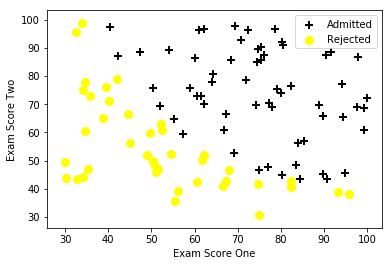

In [4]:
data_set_one = load_data('ex2data1.txt')
plot_data(data_set_one, 'Exam Score One', 'Exam Score Two', 'Admitted', 'Rejected')

**Sigmoid Function**


In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid(0)

0.5

**Cost Function**

In [6]:
def compute_cost(theta, x_values, y_values):
    # Number of training examples
    m = len(y_values)
    # Initialize cost as 0
    J = 0
    # Hypothesis
    h = sigmoid(x_values.dot(theta))
    # Algorithm
    J = (1/m)*(np.negative(np.log(h).T.dot(y_values))-np.log(1-h).T.dot(1-y_values))
    return J

In [7]:
def compute_gradient(theta, x_values, y_values):
    # Number of training examples
    m = len(y_values)
    # Hypothesis
    h = sigmoid(x_values.dot(theta))
    # Algorithm
    grad = (1/m)*((h-y_values).T.dot(x_values))
    return grad

In [8]:
x_values = np.c_[np.ones(data_set_one.shape[0]), data_set_one[:,:2]]
y_values = data_set_one[:, 2]

# Use the number of elements in the first row of the x_values array
theta = np.transpose(np.zeros(x_values.shape[1]))

cost = compute_cost(theta, x_values, y_values)
grad = compute_gradient(theta, x_values, y_values,)

print('Cost: \n', cost)
print('Gradient: \n', grad)

Cost: 
 0.6931471805599452
Gradient: 
 [ -0.1        -12.00921659 -11.26284221]


**Minimization Function**

In [9]:
res = minimize(compute_cost, theta, args=(x_values, y_values), method=None, jac=compute_gradient, options={'maxiter':400})
res

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


      fun: 0.20349770158944375
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476824e-09, -9.31921320e-07, -2.82608931e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

**Predict**

In [10]:
def predict(theta, x_values):
    return (sigmoid(x_values.dot(theta))>=0.5).astype('int')

In [11]:
# Probability of admission with 45% on exam 1 and 85% on exam 2
sigmoid(np.array([1, 45, 85]).dot(res.x))

0.7762907240588949

In [12]:
# Prediction of admission
predict(res.x, np.array([1, 45, 85]))

1

In [13]:
p = predict(res.x, x_values)
# Train accuracy
print('Train Accuracy: {}%'.format(100*sum(p == y_values.ravel())/p.size))

Train Accuracy: 89.0%


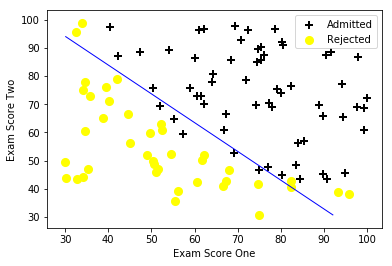

In [14]:
plot_data(data_set_one, 'Exam Score One', 'Exam Score Two', 'Admitted', 'Rejected')
# Plot the decision boundary
x1_min, x1_max = x_values[:,1].min(), x_values[:,1].max()
x2_min, x2_max = x_values[:,2].min(), x_values[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

**Regularized Logistic Regression**

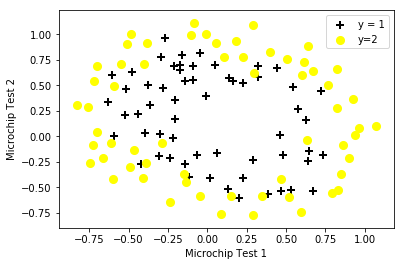

In [16]:
data_set_two = load_data('ex2data2.txt')
plot_data(data_set_two, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y=2')